In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wafersfaultdata/test.csv
/kaggle/input/wafersfaultdata/WafersData.csv


### Importing Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'kaggle'

%matplotlib inline

In [3]:
## Reading the features which are stored as a dataframe
file_path = '/kaggle/input/wafersfaultdata/WafersData.csv'
wafers = pd.read_csv(file_path)
print(f"Shape of the feature store dataset: {wafers.shape}\n")
wafers.head()

Shape of the feature store dataset: (100, 592)



,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,Sensor-11,Sensor-12,Sensor-13,Sensor-14,Sensor-15,Sensor-16,Sensor-17,Sensor-18,Sensor-19,Sensor-20,Sensor-21,Sensor-22,Sensor-23,Sensor-24,Sensor-25,Sensor-26,Sensor-27,Sensor-28,Sensor-29,Sensor-30,Sensor-31,Sensor-32,Sensor-33,Sensor-34,Sensor-35,Sensor-36,Sensor-37,Sensor-38,Sensor-39,Sensor-40,Sensor-41,Sensor-42,Sensor-43,Sensor-44,Sensor-45,Sensor-46,Sensor-47,Sensor-48,Sensor-49,Sensor-50,Sensor-51,Sensor-52,Sensor-53,Sensor-54,Sensor-55,Sensor-56,Sensor-57,Sensor-58,Sensor-59,Sensor-60,Sensor-61,Sensor-62,Sensor-63,Sensor-64,Sensor-65,Sensor-66,Sensor-67,Sensor-68,Sensor-69,Sensor-70,Sensor-71,Sensor-72,Sensor-73,Sensor-74,Sensor-75,Sensor-76,Sensor-77,Sensor-78,Sensor-79,Sensor-80,Sensor-81,Sensor-82,Sensor-83,Sensor-84,Sensor-85,Sensor-86,Sensor-87,Sensor-88,Sensor-89,Sensor-90,Sensor-91,Sensor-92,Sensor-93,Sensor-94,Sensor-95,Sensor-96,Sensor-97,Sensor-98,Sensor-99,Sensor-100,Sensor-101,Sensor-102,Sensor-103,Sensor-104,Sensor-105,Sensor-106,Sensor-107,Sensor-108,Sensor-109,Sensor-110,Sensor-111,Sensor-112,Sensor-113,Sensor-114,Sensor-115,Sensor-116,Sensor-117,Sensor-118,Sensor-119,Sensor-120,Sensor-121,Sensor-122,Sensor-123,Sensor-124,Sensor-125,Sensor-126,Sensor-127,Sensor-128,Sensor-129,Sensor-130,Sensor-131,Sensor-132,Sensor-133,Sensor-134,Sensor-135,Sensor-136,Sensor-137,Sensor-138,Sensor-139,Sensor-140,Sensor-141,Sensor-142,Sensor-143,Sensor-144,Sensor-145,Sensor-146,Sensor-147,Sensor-148,Sensor-149,Sensor-150,Sensor-151,Sensor-152,Sensor-153,Sensor-154,Sensor-155,Sensor-156,Sensor-157,Sensor-158,Sensor-159,Sensor-160,Sensor-161,Sensor-162,Sensor-163,Sensor-164,Sensor-165,Sensor-166,Sensor-167,Sensor-168,Sensor-169,Sensor-170,Sensor-171,Sensor-172,Sensor-173,Sensor-174,Sensor-175,Sensor-176,Sensor-177,Sensor-178,Sensor-179,Sensor-180,Sensor-181,Sensor-182,Sensor-183,Sensor-184,Sensor-185,Sensor-186,Sensor-187,Sensor-188,Sensor-189,Sensor-190,Sensor-191,Sensor-192,Sensor-193,Sensor-194,Sensor-195,Sensor-196,Sensor-197,Sensor-198,Sensor-199,Sensor-200,Sensor-201,Sensor-202,Sensor-203,Sensor-204,Sensor-205,Sensor-206,Sensor-207,Sensor-208,Sensor-209,Sensor-210,Sensor-211,Sensor-212,Sensor-213,Sensor-214,Sensor-215,Sensor-216,Sensor-217,Sensor-218,Sensor-219,Sensor-220,Sensor-221,Sensor-222,Sensor-223,Sensor-224,Sensor-225,Sensor-226,Sensor-227,Sensor-228,Sensor-229,Sensor-230,Sensor-231,Sensor-232,Sensor-233,Sensor-234,Sensor-235,Sensor-236,Sensor-237,Sensor-238,Sensor-239,Sensor-240,Sensor-241,Sensor-242,Sensor-243,Sensor-244,Sensor-245,Sensor-246,Sensor-247,Sensor-248,Sensor-249,Sensor-250,Sensor-251,Sensor-252,Sensor-253,Sensor-254,Sensor-255,Sensor-256,Sensor-257,Sensor-258,Sensor-259,Sensor-260,Sensor-261,Sensor-262,Sensor-263,Sensor-264,Sensor-265,Sensor-266,Sensor-267,Sensor-268,Sensor-269,Sensor-270,Sensor-271,Sensor-272,Sensor-273,Sensor-274,Sensor-275,Sensor-276,Sensor-277,Sensor-278,Sensor-279,Sensor-280,Sensor-281,Sensor-282,Sensor-283,Sensor-284,Sensor-285,Sensor-286,Sensor-287,Sensor-288,Sensor-289,Sensor-290,Sensor-291,Sensor-292,Sensor-293,Sensor-294,Sensor-295,Sensor-296,Sensor-297,Sensor-298,Sensor-299,Sensor-300,Sensor-301,Sensor-302,Sensor-303,Sensor-304,Sensor-305,Sensor-306,Sensor-307,Sensor-308,Sensor-309,Sensor-310,Sensor-311,Sensor-312,Sensor-313,Sensor-314,Sensor-315,Sensor-316,Sensor-317,Sensor-318,Sensor-319,Sensor-320,Sensor-321,Sensor-322,Sensor-323,Sensor-324,Sensor-325,Sensor-326,Sensor-327,Sensor-328,Sensor-329,Sensor-330,Sensor-331,Sensor-332,Sensor-333,Sensor-334,Sensor-335,Sensor-336,Sensor-337,Sensor-338,Sensor-339,Sensor-340,Sensor-341,Sensor-342,Sensor-343,Sensor-344,Sensor-345,Sensor-346,Sensor-347,Sensor-348,Sensor-349,Sensor-350,Sensor-351,Sensor-352,Sensor-353,Sensor-354,Sensor-355,Sensor-356,Sensor-357,Sensor-358,Sensor-359,Sensor-360,Sensor-361,Sensor-362,Sensor-363,Sensor-364,Sensor-365,Sensor-366,Sensor-367,Sensor-368,Sensor-369,Sensor-370,Sensor-371,Sensor-372,Sens

In [4]:
wafers.columns

Index(['Unnamed: 0', 'Sensor-1', 'Sensor-2', 'Sensor-3', 'Sensor-4',
       'Sensor-5', 'Sensor-6', 'Sensor-7', 'Sensor-8', 'Sensor-9',
       ...
       'Sensor-582', 'Sensor-583', 'Sensor-584', 'Sensor-585', 'Sensor-586',
       'Sensor-587', 'Sensor-588', 'Sensor-589', 'Sensor-590', 'Good/Bad'],
      dtype='object', length=592)

In [5]:
wafers.drop(columns=["Unnamed: 0"], axis=1, inplace=True)
wafers.head()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,Sensor-11,Sensor-12,Sensor-13,Sensor-14,Sensor-15,Sensor-16,Sensor-17,Sensor-18,Sensor-19,Sensor-20,Sensor-21,Sensor-22,Sensor-23,Sensor-24,Sensor-25,Sensor-26,Sensor-27,Sensor-28,Sensor-29,Sensor-30,Sensor-31,Sensor-32,Sensor-33,Sensor-34,Sensor-35,Sensor-36,Sensor-37,Sensor-38,Sensor-39,Sensor-40,Sensor-41,Sensor-42,Sensor-43,Sensor-44,Sensor-45,Sensor-46,Sensor-47,Sensor-48,Sensor-49,Sensor-50,Sensor-51,Sensor-52,Sensor-53,Sensor-54,Sensor-55,Sensor-56,Sensor-57,Sensor-58,Sensor-59,Sensor-60,Sensor-61,Sensor-62,Sensor-63,Sensor-64,Sensor-65,Sensor-66,Sensor-67,Sensor-68,Sensor-69,Sensor-70,Sensor-71,Sensor-72,Sensor-73,Sensor-74,Sensor-75,Sensor-76,Sensor-77,Sensor-78,Sensor-79,Sensor-80,Sensor-81,Sensor-82,Sensor-83,Sensor-84,Sensor-85,Sensor-86,Sensor-87,Sensor-88,Sensor-89,Sensor-90,Sensor-91,Sensor-92,Sensor-93,Sensor-94,Sensor-95,Sensor-96,Sensor-97,Sensor-98,Sensor-99,Sensor-100,Sensor-101,Sensor-102,Sensor-103,Sensor-104,Sensor-105,Sensor-106,Sensor-107,Sensor-108,Sensor-109,Sensor-110,Sensor-111,Sensor-112,Sensor-113,Sensor-114,Sensor-115,Sensor-116,Sensor-117,Sensor-118,Sensor-119,Sensor-120,Sensor-121,Sensor-122,Sensor-123,Sensor-124,Sensor-125,Sensor-126,Sensor-127,Sensor-128,Sensor-129,Sensor-130,Sensor-131,Sensor-132,Sensor-133,Sensor-134,Sensor-135,Sensor-136,Sensor-137,Sensor-138,Sensor-139,Sensor-140,Sensor-141,Sensor-142,Sensor-143,Sensor-144,Sensor-145,Sensor-146,Sensor-147,Sensor-148,Sensor-149,Sensor-150,Sensor-151,Sensor-152,Sensor-153,Sensor-154,Sensor-155,Sensor-156,Sensor-157,Sensor-158,Sensor-159,Sensor-160,Sensor-161,Sensor-162,Sensor-163,Sensor-164,Sensor-165,Sensor-166,Sensor-167,Sensor-168,Sensor-169,Sensor-170,Sensor-171,Sensor-172,Sensor-173,Sensor-174,Sensor-175,Sensor-176,Sensor-177,Sensor-178,Sensor-179,Sensor-180,Sensor-181,Sensor-182,Sensor-183,Sensor-184,Sensor-185,Sensor-186,Sensor-187,Sensor-188,Sensor-189,Sensor-190,Sensor-191,Sensor-192,Sensor-193,Sensor-194,Sensor-195,Sensor-196,Sensor-197,Sensor-198,Sensor-199,Sensor-200,Sensor-201,Sensor-202,Sensor-203,Sensor-204,Sensor-205,Sensor-206,Sensor-207,Sensor-208,Sensor-209,Sensor-210,Sensor-211,Sensor-212,Sensor-213,Sensor-214,Sensor-215,Sensor-216,Sensor-217,Sensor-218,Sensor-219,Sensor-220,Sensor-221,Sensor-222,Sensor-223,Sensor-224,Sensor-225,Sensor-226,Sensor-227,Sensor-228,Sensor-229,Sensor-230,Sensor-231,Sensor-232,Sensor-233,Sensor-234,Sensor-235,Sensor-236,Sensor-237,Sensor-238,Sensor-239,Sensor-240,Sensor-241,Sensor-242,Sensor-243,Sensor-244,Sensor-245,Sensor-246,Sensor-247,Sensor-248,Sensor-249,Sensor-250,Sensor-251,Sensor-252,Sensor-253,Sensor-254,Sensor-255,Sensor-256,Sensor-257,Sensor-258,Sensor-259,Sensor-260,Sensor-261,Sensor-262,Sensor-263,Sensor-264,Sensor-265,Sensor-266,Sensor-267,Sensor-268,Sensor-269,Sensor-270,Sensor-271,Sensor-272,Sensor-273,Sensor-274,Sensor-275,Sensor-276,Sensor-277,Sensor-278,Sensor-279,Sensor-280,Sensor-281,Sensor-282,Sensor-283,Sensor-284,Sensor-285,Sensor-286,Sensor-287,Sensor-288,Sensor-289,Sensor-290,Sensor-291,Sensor-292,Sensor-293,Sensor-294,Sensor-295,Sensor-296,Sensor-297,Sensor-298,Sensor-299,Sensor-300,Sensor-301,Sensor-302,Sensor-303,Sensor-304,Sensor-305,Sensor-306,Sensor-307,Sensor-308,Sensor-309,Sensor-310,Sensor-311,Sensor-312,Sensor-313,Sensor-314,Sensor-315,Sensor-316,Sensor-317,Sensor-318,Sensor-319,Sensor-320,Sensor-321,Sensor-322,Sensor-323,Sensor-324,Sensor-325,Sensor-326,Sensor-327,Sensor-328,Sensor-329,Sensor-330,Sensor-331,Sensor-332,Sensor-333,Sensor-334,Sensor-335,Sensor-336,Sensor-337,Sensor-338,Sensor-339,Sensor-340,Sensor-341,Sensor-342,Sensor-343,Sensor-344,Sensor-345,Sensor-346,Sensor-347,Sensor-348,Sensor-349,Sensor-350,Sensor-351,Sensor-352,Sensor-353,Sensor-354,Sensor-355,Sensor-356,Sensor-357,Sensor-358,Sensor-359,Sensor-360,Sensor-361,Sensor-362,Sensor-363,Sensor-364,Sensor-365,Sensor-366,Sensor-367,Sensor-368,Sensor-369,Sensor-370,Sensor-371,Sensor-372,Sensor-373,Sens

In [6]:
def sevemSigma(df: pd.DataFrame):
    """
    Print basic information and statistics of the dataset for better understanding.

    Parameters:
    - df (pd.DataFrame): The input dataset.

    Returns:
    None
    """
    ## Display the shape of the datset
    print(f"\nShape of the feature store dataset: {df.shape}\n")
    
    ## Display a sample of dataset
    print("\nSamples of records from the dataset:\n")
    display(df.sample(5).style.background_gradient(cmap="Blues"))
    
    ## Display general information about the dataset
    print("\nInformation about the dataset:\n")
    display(df.info())
    
    ## Display descriptive statistics for numerical columns
    print("\nDescription of the dataset for numerical column:\n")
    display(df.describe().style.background_gradient(cmap="Blues"))
    
    ## Display the percentage of null values for dataset
    print(f"\nNull values within entire the datset: {df.isnull().sum().sum() / (wafers.shape[0] * (wafers.shape[1]-1)) * 100:.2f} %\n")
    
    ## Display the duplicated rows in the dataset
    print("\nDuplicated rows in the dataset:")
    print("But there is no need to check this because sensor data might be duplicate.\n")
    display(df[df.duplicated()].style.background_gradient(cmap="Blues"))
    
    

In [7]:
sevemSigma(wafers)


Shape of the feature store dataset: (100, 591)


Samples of records from the dataset:




Information about the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 591 entries, Sensor-1 to Good/Bad
dtypes: float64(494), int64(97)
memory usage: 461.8 KB


None


Description of the dataset for numerical column:




Null values within entire the datset: 3.91 %


Duplicated rows in the dataset:
But there is no need to check this because sensor data might be duplicate.



,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,Sensor-11,Sensor-12,Sensor-13,Sensor-14,Sensor-15,Sensor-16,Sensor-17,Sensor-18,Sensor-19,Sensor-20,Sensor-21,Sensor-22,Sensor-23,Sensor-24,Sensor-25,Sensor-26,Sensor-27,Sensor-28,Sensor-29,Sensor-30,Sensor-31,Sensor-32,Sensor-33,Sensor-34,Sensor-35,Sensor-36,Sensor-37,Sensor-38,Sensor-39,Sensor-40,Sensor-41,Sensor-42,Sensor-43,Sensor-44,Sensor-45,Sensor-46,Sensor-47,Sensor-48,Sensor-49,Sensor-50,Sensor-51,Sensor-52,Sensor-53,Sensor-54,Sensor-55,Sensor-56,Sensor-57,Sensor-58,Sensor-59,Sensor-60,Sensor-61,Sensor-62,Sensor-63,Sensor-64,Sensor-65,Sensor-66,Sensor-67,Sensor-68,Sensor-69,Sensor-70,Sensor-71,Sensor-72,Sensor-73,Sensor-74,Sensor-75,Sensor-76,Sensor-77,Sensor-78,Sensor-79,Sensor-80,Sensor-81,Sensor-82,Sensor-83,Sensor-84,Sensor-85,Sensor-86,Sensor-87,Sensor-88,Sensor-89,Sensor-90,Sensor-91,Sensor-92,Sensor-93,Sensor-94,Sensor-95,Sensor-96,Sensor-97,Sensor-98,Sensor-99,Sensor-100,Sensor-101,Sensor-102,Sensor-103,Sensor-104,Sensor-105,Sensor-106,Sensor-107,Sensor-108,Sensor-109,Sensor-110,Sensor-111,Sensor-112,Sensor-113,Sensor-114,Sensor-115,Sensor-116,Sensor-117,Sensor-118,Sensor-119,Sensor-120,Sensor-121,Sensor-122,Sensor-123,Sensor-124,Sensor-125,Sensor-126,Sensor-127,Sensor-128,Sensor-129,Sensor-130,Sensor-131,Sensor-132,Sensor-133,Sensor-134,Sensor-135,Sensor-136,Sensor-137,Sensor-138,Sensor-139,Sensor-140,Sensor-141,Sensor-142,Sensor-143,Sensor-144,Sensor-145,Sensor-146,Sensor-147,Sensor-148,Sensor-149,Sensor-150,Sensor-151,Sensor-152,Sensor-153,Sensor-154,Sensor-155,Sensor-156,Sensor-157,Sensor-158,Sensor-159,Sensor-160,Sensor-161,Sensor-162,Sensor-163,Sensor-164,Sensor-165,Sensor-166,Sensor-167,Sensor-168,Sensor-169,Sensor-170,Sensor-171,Sensor-172,Sensor-173,Sensor-174,Sensor-175,Sensor-176,Sensor-177,Sensor-178,Sensor-179,Sensor-180,Sensor-181,Sensor-182,Sensor-183,Sensor-184,Sensor-185,Sensor-186,Sensor-187,Sensor-188,Sensor-189,Sensor-190,Sensor-191,Sensor-192,Sensor-193,Sensor-194,Sensor-195,Sensor-196,Sensor-197,Sensor-198,Sensor-199,Sensor-200,Sensor-201,Sensor-202,Sensor-203,Sensor-204,Sensor-205,Sensor-206,Sensor-207,Sensor-208,Sensor-209,Sensor-210,Sensor-211,Sensor-212,Sensor-213,Sensor-214,Sensor-215,Sensor-216,Sensor-217,Sensor-218,Sensor-219,Sensor-220,Sensor-221,Sensor-222,Sensor-223,Sensor-224,Sensor-225,Sensor-226,Sensor-227,Sensor-228,Sensor-229,Sensor-230,Sensor-231,Sensor-232,Sensor-233,Sensor-234,Sensor-235,Sensor-236,Sensor-237,Sensor-238,Sensor-239,Sensor-240,Sensor-241,Sensor-242,Sensor-243,Sensor-244,Sensor-245,Sensor-246,Sensor-247,Sensor-248,Sensor-249,Sensor-250,Sensor-251,Sensor-252,Sensor-253,Sensor-254,Sensor-255,Sensor-256,Sensor-257,Sensor-258,Sensor-259,Sensor-260,Sensor-261,Sensor-262,Sensor-263,Sensor-264,Sensor-265,Sensor-266,Sensor-267,Sensor-268,Sensor-269,Sensor-270,Sensor-271,Sensor-272,Sensor-273,Sensor-274,Sensor-275,Sensor-276,Sensor-277,Sensor-278,Sensor-279,Sensor-280,Sensor-281,Sensor-282,Sensor-283,Sensor-284,Sensor-285,Sensor-286,Sensor-287,Sensor-288,Sensor-289,Sensor-290,Sensor-291,Sensor-292,Sensor-293,Sensor-294,Sensor-295,Sensor-296,Sensor-297,Sensor-298,Sensor-299,Sensor-300,Sensor-301,Sensor-302,Sensor-303,Sensor-304,Sensor-305,Sensor-306,Sensor-307,Sensor-308,Sensor-309,Sensor-310,Sensor-311,Sensor-312,Sensor-313,Sensor-314,Sensor-315,Sensor-316,Sensor-317,Sensor-318,Sensor-319,Sensor-320,Sensor-321,Sensor-322,Sensor-323,Sensor-324,Sensor-325,Sensor-326,Sensor-327,Sensor-328,Sensor-329,Sensor-330,Sensor-331,Sensor-332,Sensor-333,Sensor-334,Sensor-335,Sensor-336,Sensor-337,Sensor-338,Sensor-339,Sensor-340,Sensor-341,Sensor-342,Sensor-343,Sensor-344,Sensor-345,Sensor-346,Sensor-347,Sensor-348,Sensor-349,Sensor-350,Sensor-351,Sensor-352,Sensor-353,Sensor-354,Sensor-355,Sensor-356,Sensor-357,Sensor-358,Sensor-359,Sensor-360,Sensor-361,Sensor-362,Sensor-363,Sensor-364,Sensor-365,Sensor-366,Sensor-367,Sensor-368,Sensor-369,Sensor-370,Sensor-371,Sensor-372,Sensor-373,Sens

From the above mentioned information we can say that there are outliers present, so it is for sure the data should be standardized.

In [8]:
## Checking for class imbalance
wafers["Good/Bad"].value_counts()

Good/Bad
-1    94
 1     6
Name: count, dtype: int64

Highly imbalanced dataset, so resampling is required.

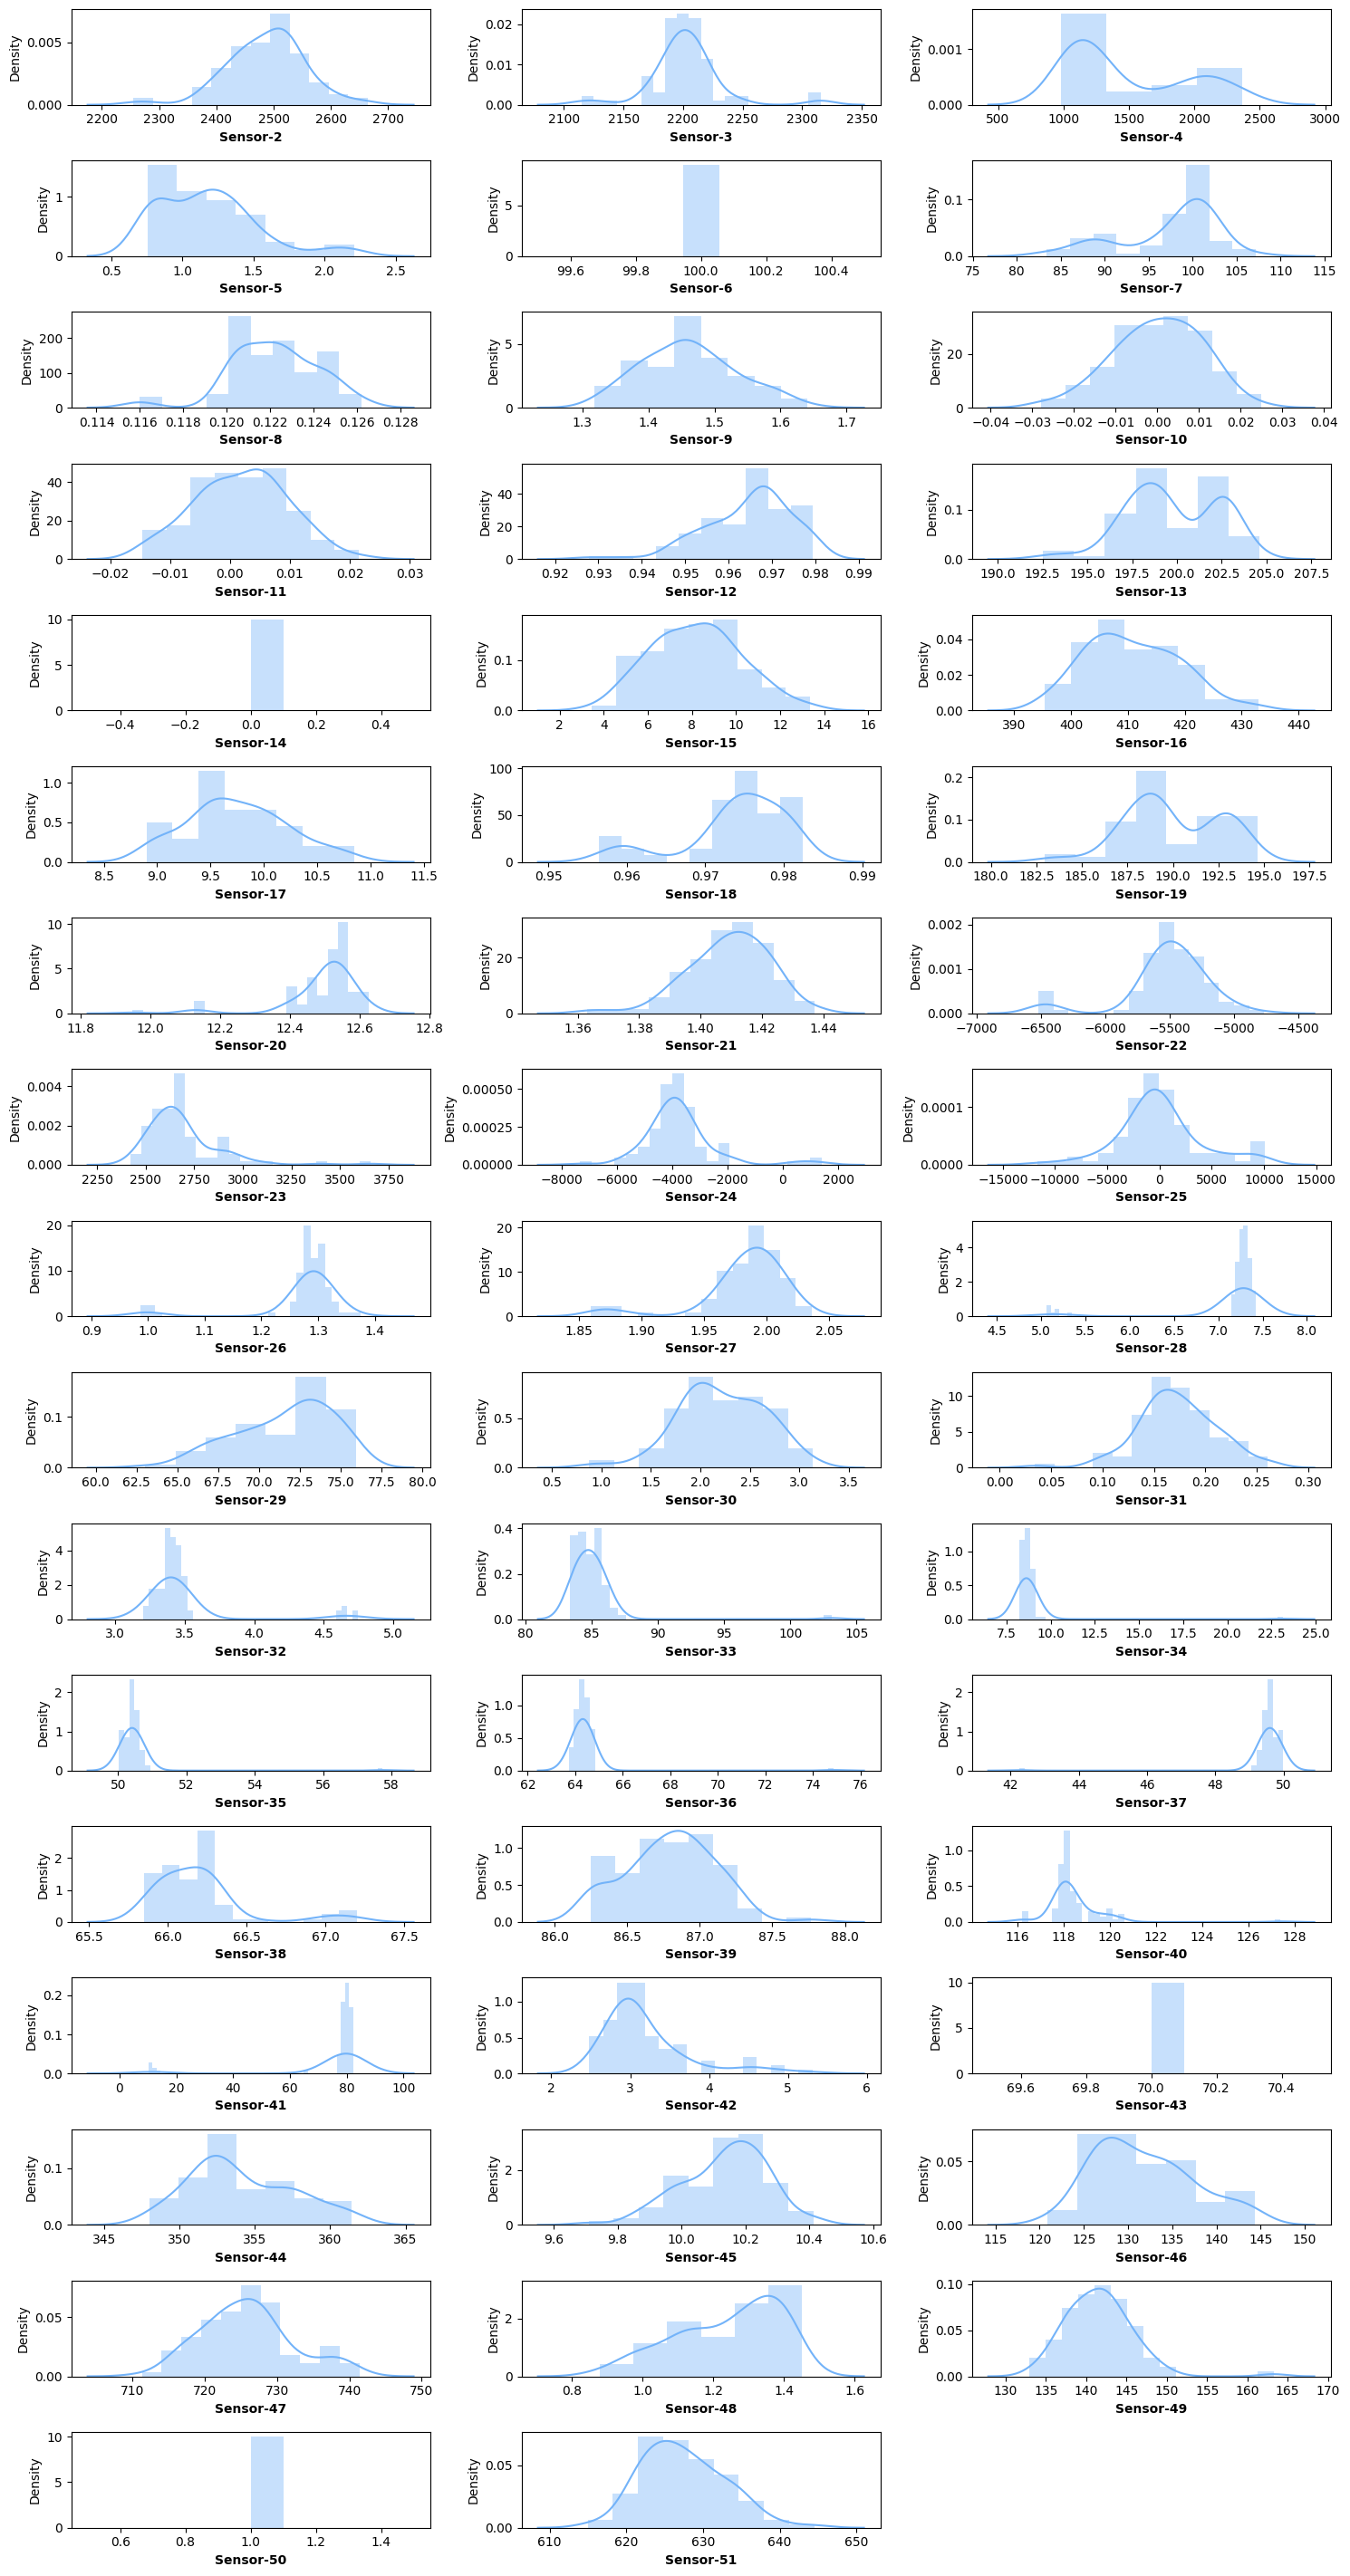

In [9]:
## Let's have a look at the distribution of first 50 sensors data
plt.figure(figsize=(15, 100))

for i, col in enumerate(wafers.columns[1:51]):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=wafers[col], color='#73b3f9')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

In [10]:
## Selecting random 50 sensors
random_50_sensors_index = []
for i in range(50):
    if i not in random_50_sensors_index:
        random_50_sensors_index.append(np.random.randint(1, 591))

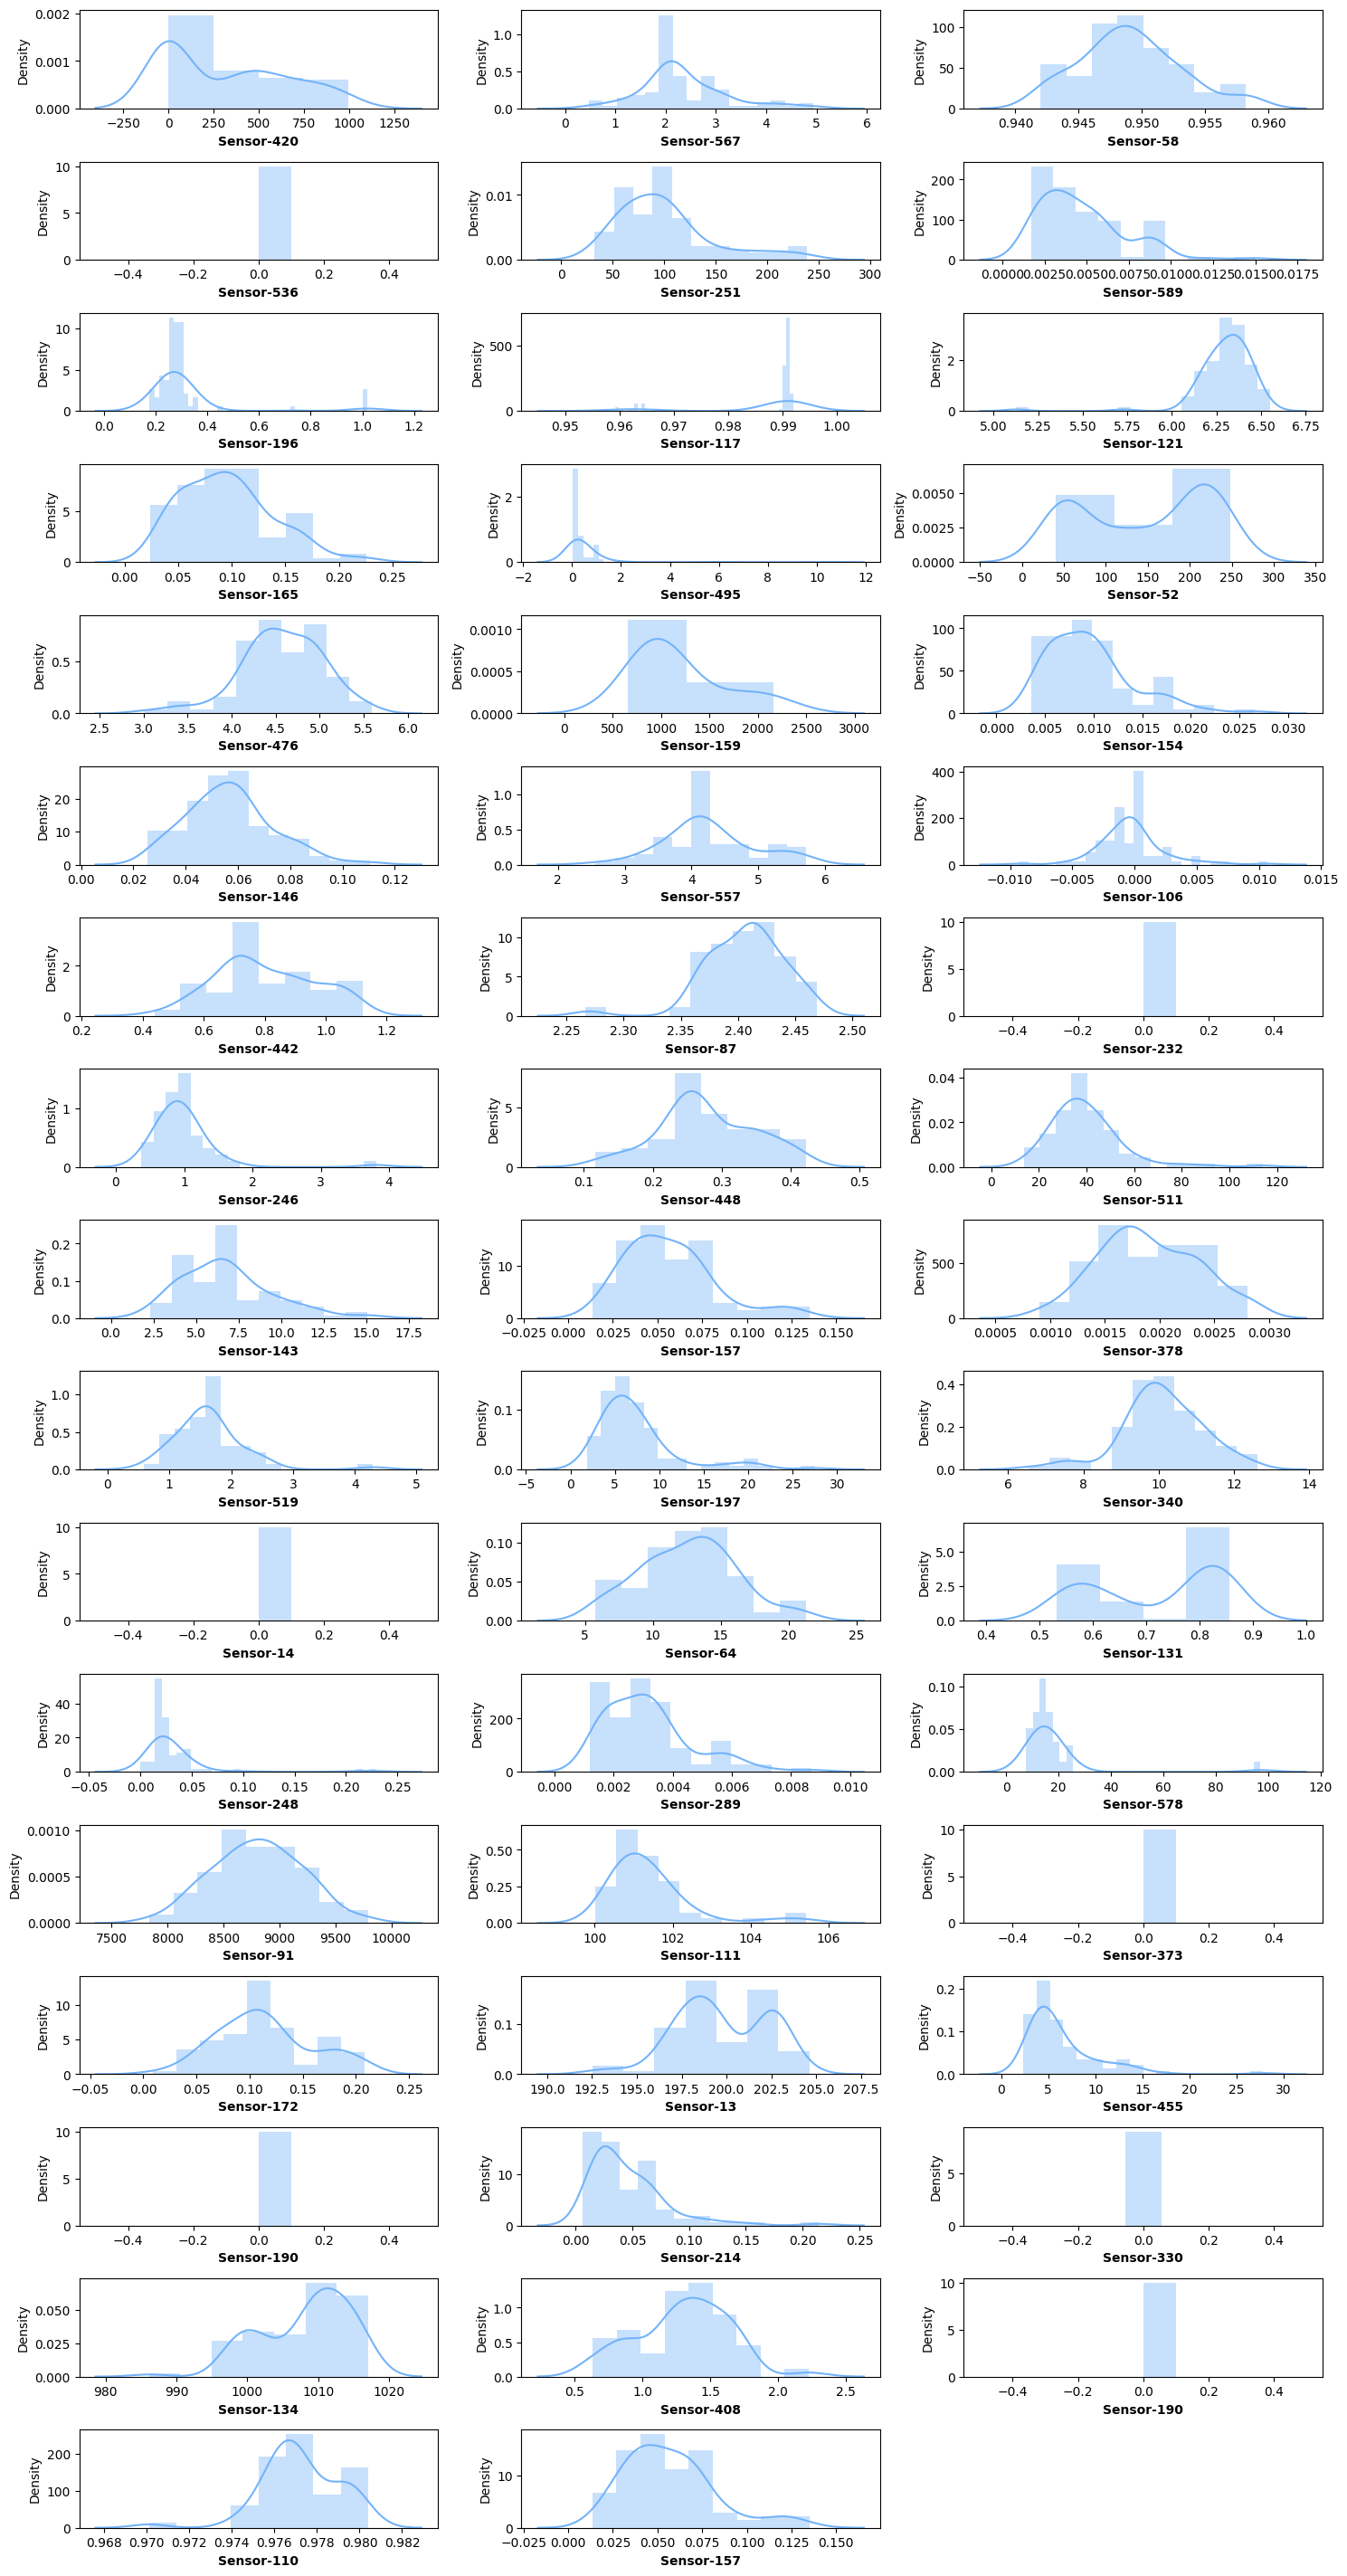

In [11]:
plt.figure(figsize=(15, 100))

for i, col in enumerate(wafers.columns[random_50_sensors_index]):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=wafers[col], color='#73b3f9')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

Pretty good of them (either first or random 50) are either constant or have right / left skewed distribution. it is not possible for us to analyze all of them and handle the outliers individually.

For the features having standard deviation 0, we straight away drop them and for other who have outliers, we gonna use RobustScaler or other scaling techniques.

In [13]:
# columns_int64 = []
# for x in list(wafers.columns):
#     if wafers[x].dtype == "int64":
#         columns_int64.append(x)

# columns_int64

In [14]:
# len(columns_int64)

In [9]:
## Getting the features having zero std and missing values over certain threshold
def get_zero_std_features(df: pd.DataFrame):
    
    """Return a list of columns having std zero"""
    
    cols_to_drop = []
    cols_name = [col for col in df.columns if df[col].dtype != 'O']
    
    for col in cols_name:
        if df[col].std() == 0:
            cols_to_drop.append(col)
            
    return cols_to_drop

def get_redundant_features(df: pd.DataFrame, missing_threshold=0.7):
    
    """Return a list of features having missing values over certain threshold"""
    
    cols_missing_ratio = df.isnull().sum().div(df.shape[0])
    cols_to_drop = list(cols_missing_ratio[cols_missing_ratio > missing_threshold].index)
    return cols_to_drop

In [10]:
cols_to_drop = get_redundant_features(wafers)
cols_to_drop.extend(get_zero_std_features(wafers))
cols_to_drop

['Sensor-158',
 'Sensor-159',
 'Sensor-293',
 'Sensor-294',
 'Sensor-6',
 'Sensor-14',
 'Sensor-43',
 'Sensor-50',
 'Sensor-53',
 'Sensor-70',
 'Sensor-75',
 'Sensor-98',
 'Sensor-142',
 'Sensor-150',
 'Sensor-179',
 'Sensor-180',
 'Sensor-187',
 'Sensor-190',
 'Sensor-191',
 'Sensor-192',
 'Sensor-193',
 'Sensor-194',
 'Sensor-195',
 'Sensor-207',
 'Sensor-210',
 'Sensor-227',
 'Sensor-230',
 'Sensor-231',
 'Sensor-232',
 'Sensor-233',
 'Sensor-234',
 'Sensor-235',
 'Sensor-236',
 'Sensor-237',
 'Sensor-238',
 'Sensor-241',
 'Sensor-242',
 'Sensor-243',
 'Sensor-244',
 'Sensor-257',
 'Sensor-258',
 'Sensor-259',
 'Sensor-260',
 'Sensor-261',
 'Sensor-262',
 'Sensor-263',
 'Sensor-264',
 'Sensor-265',
 'Sensor-266',
 'Sensor-267',
 'Sensor-277',
 'Sensor-285',
 'Sensor-314',
 'Sensor-315',
 'Sensor-316',
 'Sensor-323',
 'Sensor-326',
 'Sensor-327',
 'Sensor-328',
 'Sensor-329',
 'Sensor-330',
 'Sensor-331',
 'Sensor-343',
 'Sensor-348',
 'Sensor-365',
 'Sensor-370',
 'Sensor-371',
 'Se

These are the columns that are not gonna contribute in anyway.

In [11]:
wafers.drop(cols_to_drop, axis=1, inplace=True)

In [12]:
## separating independent and dependent features
X, y = wafers.iloc[:,:-1], wafers["Good/Bad"]
print(f"Shape of the X: {X.shape}\n")
X.head()

Shape of the X: (100, 464)



,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,Sensor-11,Sensor-12,Sensor-13,Sensor-15,Sensor-16,Sensor-17,Sensor-18,Sensor-19,Sensor-20,Sensor-21,Sensor-22,Sensor-23,Sensor-24,Sensor-25,Sensor-26,Sensor-27,Sensor-28,Sensor-29,Sensor-30,Sensor-31,Sensor-32,Sensor-33,Sensor-34,Sensor-35,Sensor-36,Sensor-37,Sensor-38,Sensor-39,Sensor-40,Sensor-41,Sensor-42,Sensor-44,Sensor-45,Sensor-46,Sensor-47,Sensor-48,Sensor-49,Sensor-51,Sensor-52,Sensor-54,Sensor-55,Sensor-56,Sensor-57,Sensor-58,Sensor-59,Sensor-60,Sensor-61,Sensor-62,Sensor-63,Sensor-64,Sensor-65,Sensor-66,Sensor-67,Sensor-68,Sensor-69,Sensor-71,Sensor-72,Sensor-73,Sensor-74,Sensor-76,Sensor-77,Sensor-78,Sensor-79,Sensor-80,Sensor-81,Sensor-82,Sensor-83,Sensor-84,Sensor-85,Sensor-86,Sensor-87,Sensor-88,Sensor-89,Sensor-90,Sensor-91,Sensor-92,Sensor-93,Sensor-94,Sensor-95,Sensor-96,Sensor-97,Sensor-99,Sensor-100,Sensor-101,Sensor-102,Sensor-103,Sensor-104,Sensor-105,Sensor-106,Sensor-107,Sensor-108,Sensor-109,Sensor-110,Sensor-111,Sensor-112,Sensor-113,Sensor-114,Sensor-115,Sensor-116,Sensor-117,Sensor-118,Sensor-119,Sensor-120,Sensor-121,Sensor-122,Sensor-123,Sensor-124,Sensor-125,Sensor-126,Sensor-127,Sensor-128,Sensor-129,Sensor-130,Sensor-131,Sensor-132,Sensor-133,Sensor-134,Sensor-135,Sensor-136,Sensor-137,Sensor-138,Sensor-139,Sensor-140,Sensor-141,Sensor-143,Sensor-144,Sensor-145,Sensor-146,Sensor-147,Sensor-148,Sensor-149,Sensor-151,Sensor-152,Sensor-153,Sensor-154,Sensor-155,Sensor-156,Sensor-157,Sensor-160,Sensor-161,Sensor-162,Sensor-163,Sensor-164,Sensor-165,Sensor-166,Sensor-167,Sensor-168,Sensor-169,Sensor-170,Sensor-171,Sensor-172,Sensor-173,Sensor-174,Sensor-175,Sensor-176,Sensor-177,Sensor-178,Sensor-181,Sensor-182,Sensor-183,Sensor-184,Sensor-185,Sensor-186,Sensor-188,Sensor-189,Sensor-196,Sensor-197,Sensor-198,Sensor-199,Sensor-200,Sensor-201,Sensor-202,Sensor-203,Sensor-204,Sensor-205,Sensor-206,Sensor-208,Sensor-209,Sensor-211,Sensor-212,Sensor-213,Sensor-214,Sensor-215,Sensor-216,Sensor-217,Sensor-218,Sensor-219,Sensor-220,Sensor-221,Sensor-222,Sensor-223,Sensor-224,Sensor-225,Sensor-226,Sensor-228,Sensor-229,Sensor-239,Sensor-240,Sensor-245,Sensor-246,Sensor-247,Sensor-248,Sensor-249,Sensor-250,Sensor-251,Sensor-252,Sensor-253,Sensor-254,Sensor-255,Sensor-256,Sensor-268,Sensor-269,Sensor-270,Sensor-271,Sensor-272,Sensor-273,Sensor-274,Sensor-275,Sensor-276,Sensor-278,Sensor-279,Sensor-280,Sensor-281,Sensor-282,Sensor-283,Sensor-284,Sensor-286,Sensor-287,Sensor-288,Sensor-289,Sensor-290,Sensor-291,Sensor-292,Sensor-295,Sensor-296,Sensor-297,Sensor-298,Sensor-299,Sensor-300,Sensor-301,Sensor-302,Sensor-303,Sensor-304,Sensor-305,Sensor-306,Sensor-307,Sensor-308,Sensor-309,Sensor-310,Sensor-311,Sensor-312,Sensor-313,Sensor-317,Sensor-318,Sensor-319,Sensor-320,Sensor-321,Sensor-322,Sensor-324,Sensor-325,Sensor-332,Sensor-333,Sensor-334,Sensor-335,Sensor-336,Sensor-337,Sensor-338,Sensor-339,Sensor-340,Sensor-341,Sensor-342,Sensor-344,Sensor-345,Sensor-346,Sensor-347,Sensor-349,Sensor-350,Sensor-351,Sensor-352,Sensor-353,Sensor-354,Sensor-355,Sensor-356,Sensor-357,Sensor-358,Sensor-359,Sensor-360,Sensor-361,Sensor-362,Sensor-363,Sensor-364,Sensor-366,Sensor-367,Sensor-368,Sensor-369,Sensor-377,Sensor-378,Sensor-383,Sensor-384,Sensor-385,Sensor-386,Sensor-387,Sensor-388,Sensor-389,Sensor-390,Sensor-391,Sensor-392,Sensor-393,Sensor-394,Sensor-406,Sensor-407,Sensor-408,Sensor-409,Sensor-410,Sensor-411,Sensor-412,Sensor-413,Sensor-414,Sensor-416,Sensor-417,Sensor-418,Sensor-419,Sensor-420,Sensor-421,Sensor-422,Sensor-424,Sensor-425,Sensor-426,Sensor-427,Sensor-428,Sensor-429,Sensor-430,Sensor-431,Sensor-432,Sensor-433,Sensor-434,Sensor-435,Sensor-436,Sensor-437,Sensor-438,Sensor-439,Sensor-440,Sensor-441,Sensor-442,Sensor-443,Sensor-444,Sensor-445,Sensor-446,Sensor-447,Sensor-448,Sensor-449,Sensor-453,Sensor-454,Sensor-455,Sensor-456,Sensor-457,Sensor-458,Sensor-460,Sensor-461,Sensor-468,Sensor-469,Sensor-470,Sensor-471,Sensor

There are total 464 contributing features.

In [13]:
print(f"Shape of the y: {y.shape}\n")
y.head()

Shape of the y: (100,)



0   -1
1    1
2   -1
3   -1
4   -1
Name: Good/Bad, dtype: int64

### Data Transformation

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import RobustScaler

imputer_step = ('Imputer', KNNImputer(n_neighbors=5))
scaler_step = ('Scaler', RobustScaler())

preprocessing_pipeline = Pipeline(
    steps=[imputer_step, scaler_step]
)
preprocessing_pipeline

Pipeline(steps=[('Imputer', KNNImputer()), ('Scaler', RobustScaler())])

In [15]:
X_transform = preprocessing_pipeline.fit_transform(X)
print(f"Shape of the transformed features set: {X_transform.shape}\n")
X_transform

Shape of the transformed features set: (100, 464)



array([[-0.37110152, -0.21388855,  0.67734164, ...,  0.46272494,
         0.515625  , -0.40093   ],
       [-0.44644841,  0.15494872, -1.33031182, ...,  0.46272494,
         0.515625  , -0.40093   ],
       [ 0.70070541,  0.08389967,  0.20459121, ...,  0.46272494,
         0.515625  , -0.40093   ],
       ...,
       [ 0.83289837, -1.31558137, -1.26864535, ..., -0.93573265,
        -0.671875  , -0.44021198],
       [-0.49988372,  0.59310515,  0.14034434, ..., -0.93573265,
        -0.671875  , -0.44021198],
       [-0.92374874, -0.35561596,  0.39961883, ..., -0.93573265,
        -0.671875  , -0.44021198]])

### Resampling the Training instances

In [16]:
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [17]:
from imblearn.combine import SMOTETomek

resampler = SMOTETomek(sampling_strategy="auto")
X_res, y_res = resampler.fit_resample(X_transform, y)

In [18]:
print(f"Before resampling, Shape of the training instances: {np.c_[X_transform, y].shape}\n")
print(f"After resampling, Shape of the training instances: {np.c_[X_res, y_res].shape}\n")

Before resampling, Shape of the training instances: (100, 465)

After resampling, Shape of the training instances: (188, 465)



In [19]:
y_res.value_counts()

Good/Bad
-1    94
 1    94
Name: count, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}\n")
print(f"X_test shape: {X_test.shape}\n")
print(f"y_train shape: {y_train.shape}\n")
print(f"y_test shape: {y_test.shape}\n")

X_train shape: (150, 464)

X_test shape: (38, 464)

y_train shape: (150,)

y_test shape: (38,)



In [21]:
def display_score(scores):
    print(f"scores: {scores}\n")
    print(f"mean: {scores.mean()}\n")
    print(f"standard deviation: {scores.std()}")

## Evaluating using cross validation

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [23]:
from catboost import CatBoostClassifier

catboost_classifier = CatBoostClassifier()

In [24]:
catboost_score = cross_val_score(catboost_classifier, X_train, y_train, scoring="roc_auc", cv=5, verbose=2)

Learning rate set to 0.004166
0:	learn: 0.6883190	total: 98.3ms	remaining: 1m 38s
1:	learn: 0.6836161	total: 123ms	remaining: 1m 1s
2:	learn: 0.6797215	total: 148ms	remaining: 49.1s
3:	learn: 0.6744411	total: 174ms	remaining: 43.4s
4:	learn: 0.6689523	total: 200ms	remaining: 39.8s
5:	learn: 0.6646967	total: 225ms	remaining: 37.3s
6:	learn: 0.6592101	total: 250ms	remaining: 35.5s
7:	learn: 0.6550201	total: 275ms	remaining: 34.1s
8:	learn: 0.6497390	total: 300ms	remaining: 33s
9:	learn: 0.6436035	total: 324ms	remaining: 32.1s
10:	learn: 0.6391445	total: 349ms	remaining: 31.4s
11:	learn: 0.6356171	total: 373ms	remaining: 30.7s
12:	learn: 0.6308322	total: 398ms	remaining: 30.2s
13:	learn: 0.6269759	total: 424ms	remaining: 29.9s
14:	learn: 0.6224829	total: 450ms	remaining: 29.5s
15:	learn: 0.6185904	total: 474ms	remaining: 29.1s
16:	learn: 0.6148298	total: 499ms	remaining: 28.8s
17:	learn: 0.6101088	total: 523ms	remaining: 28.6s
18:	learn: 0.6061895	total: 548ms	remaining: 28.3s
19:	learn: 

In [25]:
display_score(catboost_score)

scores: [1. 1. 1. 1. 1.]

mean: 1.0

standard deviation: 0.0


In [26]:
y_pred = cross_val_predict(catboost_classifier, X_test, y_test, cv=5)

Learning rate set to 0.002305
0:	learn: 0.6912847	total: 15.3ms	remaining: 15.2s
1:	learn: 0.6894607	total: 25.8ms	remaining: 12.9s
2:	learn: 0.6876119	total: 35ms	remaining: 11.6s
3:	learn: 0.6856356	total: 44.3ms	remaining: 11s
4:	learn: 0.6834661	total: 53.3ms	remaining: 10.6s
5:	learn: 0.6810300	total: 57.5ms	remaining: 9.53s
6:	learn: 0.6789619	total: 66.8ms	remaining: 9.47s
7:	learn: 0.6768016	total: 76.1ms	remaining: 9.44s
8:	learn: 0.6748135	total: 85.2ms	remaining: 9.38s
9:	learn: 0.6727210	total: 94.2ms	remaining: 9.32s
10:	learn: 0.6704683	total: 103ms	remaining: 9.28s
11:	learn: 0.6687850	total: 112ms	remaining: 9.24s
12:	learn: 0.6669330	total: 122ms	remaining: 9.23s
13:	learn: 0.6643565	total: 131ms	remaining: 9.21s
14:	learn: 0.6624003	total: 140ms	remaining: 9.22s
15:	learn: 0.6609231	total: 150ms	remaining: 9.22s
16:	learn: 0.6585341	total: 155ms	remaining: 8.94s
17:	learn: 0.6564247	total: 164ms	remaining: 8.96s
18:	learn: 0.6546589	total: 174ms	remaining: 8.96s
19:	l

In [27]:
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score

print(f"precision_score: {precision_score(y_true=y_test, y_pred=y_pred)}\n")
print(f"recall_score: {recall_score(y_true=y_test, y_pred=y_pred)}\n")
print(f"f1_score: {f1_score(y_true=y_test, y_pred=y_pred)}\n")
print(f"roc_auc_score: {roc_auc_score(y_true=y_test, y_score=y_pred)}")

precision_score: 0.8181818181818182

recall_score: 0.9473684210526315

f1_score: 0.8780487804878049

roc_auc_score: 0.868421052631579


In [28]:
from sklearn.ensemble import RandomForestClassifier

random_classifier = RandomForestClassifier()
random_score = cross_val_score(random_classifier, X_train, y_train, scoring="roc_auc", cv=10, verbose=2)

[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.3s


In [29]:
y_pred = cross_val_predict(random_classifier, X_test, y_test, cv=5)

In [31]:
display_score(random_score)

scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

mean: 1.0

standard deviation: 0.0


In [30]:
print(f"precision_score: {precision_score(y_true=y_test, y_pred=y_pred)}\n")
print(f"recall_score: {recall_score(y_true=y_test, y_pred=y_pred)}\n")
print(f"f1_score: {f1_score(y_true=y_test, y_pred=y_pred)}\n")
print(f"roc_auc_score: {roc_auc_score(y_true=y_test, y_score=y_pred)}")

precision_score: 1.0

recall_score: 0.9473684210526315

f1_score: 0.972972972972973

roc_auc_score: 0.9736842105263157
